## Exercício Correlação

Carregue a base de dados das casas (house-prices.csv) e gere as correlações entre todos os atributos. Quais atributos estão mais relacionados com o preço das casas?

### Importações

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Base de dados

In [19]:
df = pd.read_csv('../../dados/house_prices.csv',)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df = df.iloc[:, 2:]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
df_corr = df.corr()
df_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [22]:
df_corr[df_corr > 0.7]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,NaN,NaN,0.702035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.000000,0.754665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,0.702035,NaN,0.754665,1.000000,NaN,NaN,NaN,NaN,NaN,0.762704,0.876597,NaN,NaN,NaN,NaN,NaN,NaN,0.756420,NaN
sqft_lot,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.718557
floors,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,0.762704,NaN,NaN,NaN,NaN,NaN,1.000000,0.755923,NaN,NaN,NaN,NaN,NaN,NaN,0.713202,NaN


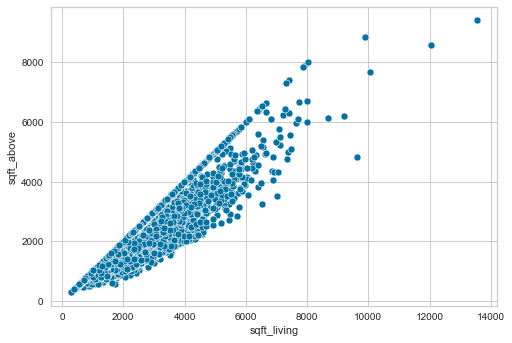

In [23]:
sns.scatterplot(x='sqft_living', y = 'sqft_above', data=df);

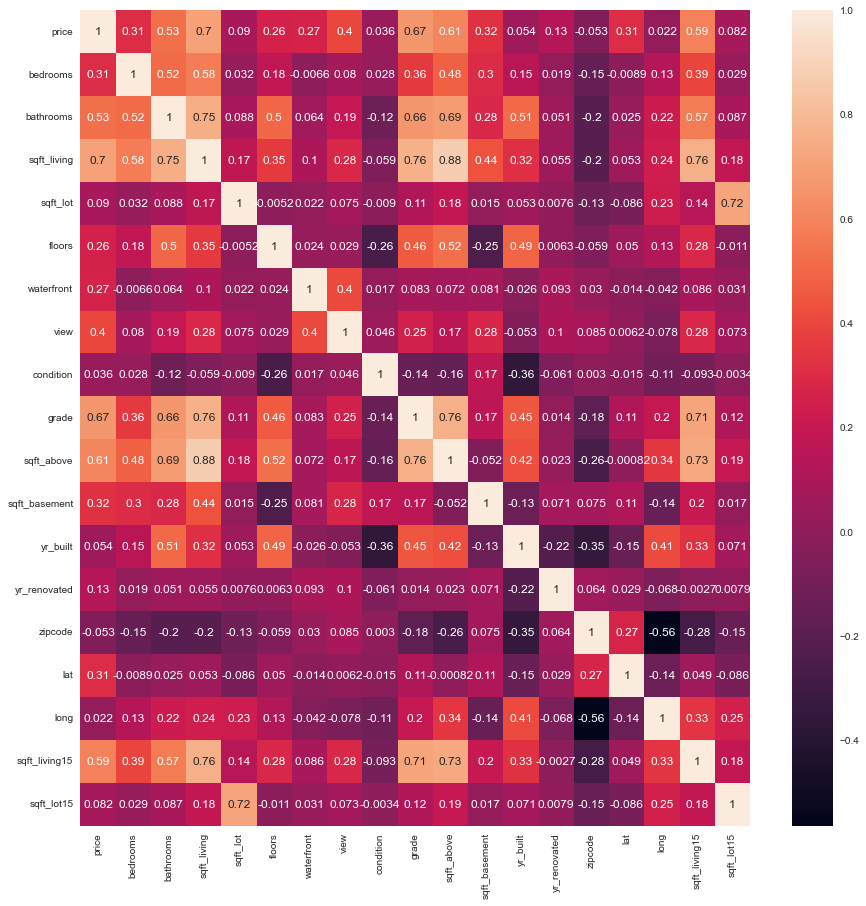

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True)

### Correlação com a biblioteca Yellowbrick

In [25]:
from yellowbrick.target import FeatureCorrelation

In [26]:
df.columns[1:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

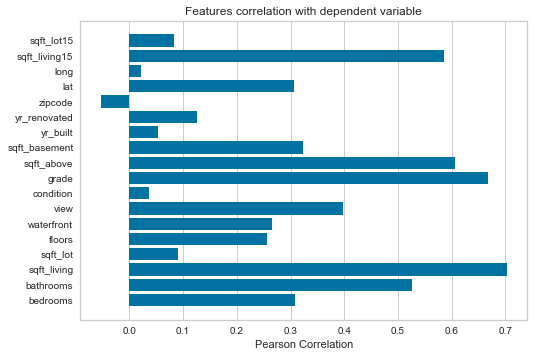

In [27]:
grafico = FeatureCorrelation(labels = df.columns[1:])
grafico.fit(df.iloc[:,1:].values, df.iloc[:, 0])
grafico.show();

### Regressão

In [30]:
X = df.iloc[:, 1:].values
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [31]:
y = df['price']

In [32]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
X_treino.shape, X_teste.shape

((17290, 18), (4323, 18))

In [34]:
regressor = LinearRegression()
regressor.fit(X_treino, y_treino)

LinearRegression()

In [35]:
#b0
regressor.intercept_

3956635.4751442745

In [36]:
#b1
regressor.coef_

array([-3.20279315e+04,  3.60409149e+04,  1.06391432e+02,  1.32288285e-01,
        1.01348768e+04,  5.38860457e+05,  5.19958026e+04,  2.76632242e+04,
        9.55651532e+04,  6.86621577e+01,  3.77292748e+01, -2.51780015e+03,
        2.10768444e+01, -5.49685041e+02,  6.10241682e+05, -2.06289119e+05,
        2.11939640e+01, -3.47658777e-01])

In [37]:
regressor.score(X_treino, y_treino)

0.7037209052270909

In [38]:
regressor.score(X_teste, y_teste)

0.6858691420603094

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
previsoes = regressor.predict(X_teste)

In [41]:
mean_absolute_error(y_teste, previsoes)

129451.37388156902

In [42]:
mean_squared_error(y_teste, previsoes)

54219291122.911964

In [43]:
math.sqrt(mean_squared_error(y_teste, previsoes))

232850.36208456272

## Seleção de atributos

In [44]:
from sklearn.feature_selection import SelectFdr, f_regression

In [48]:
selecao = SelectFdr(f_regression, alpha = 0.0)
X_novo = selecao.fit_transform(X, y)
X.shape, X_novo.shape

((21613, 18), (21613, 10))

In [49]:
colunas = selecao.get_support()
colunas

array([ True,  True,  True, False, False,  True,  True, False,  True,
        True,  True, False, False, False,  True, False,  True, False])

In [55]:
df.columns[1:][colunas==True]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [56]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_novo, y, test_size=0.2, random_state=1)

In [57]:
regressor = LinearRegression()
regressor.fit(X_treino, y_treino)

LinearRegression()

In [58]:
regressor.score(X_treino, y_treino)

0.659409096191317

In [59]:
regressor.score(X_teste, y_teste)

0.6442350459801658